<h1 style="font-family:verdana; text-align: center;"> AUGMENTED ALZHEIMER CLASSIFICATION </h1>

<p style="text-align: center; color:#0404e2; font-family:verdana; font-size: 24px; font-weight: bold;">
    AMALIO GÓMEZ LÓPEZ
    <br>
    <a href="https://www.linkedin.com/in/amaliogomezlopez/" style="color: #159364; text-decoration: underline; font-size: 24px;" target="_blank">LinkedIn</a>
    <br>
    <a href="https://amaliogomezlopez.com/" style="color: #159364; text-decoration: underline; font-size: 24px;" target="_blank">Personal Website</a>
    <br>
    <a href="https://github.com/amaliogomezlopez" style="color: #159364; text-decoration: underline; font-size: 24px;" target="_blank">GitHub</a>
</p>



![brain_alzheimer.png](https://centralca.cdn-anvilcms.net/media/images/2018/08/07/images/alzheimers-scan.max-752x423.jpg)

<h2>  <center> Where is the data coming from?</center> </h2>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
📍Information about the data
    
The Data is hand collected from various websites with each and every labels verified. The images are MRIs. Original data can be found:
https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images


    
Augmented Data can be found:
https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset
    
    
</p>
</div>


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Magnetic Resonance Imaging (MRI) is a non-invasive imaging technology that produces three dimensional detailed anatomical images. It is often used for disease detection, diagnosis, and treatment monitoring. It is based on sophisticated technology that excites and detects the change in the direction of the rotational axis of protons found in the water that makes up living tissues.
</div>




# **1 - IMPORTING LIBRARIES**

In [34]:
#MATH AND DATA MANIPULATION
import numpy as np 
import pandas as pd

#OPERATING SYSTEM
import os

#VISUALIZATION
import matplotlib.pyplot as plt
import pathlib
from PIL import Image
from IPython.display import Image, display

#DEEPLEARNING - CNN - TENSORFLOW
import tensorflow as tf
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

#WARNINGS
import warnings
warnings.filterwarnings("ignore")

# **2 - LOADING PATHS**

In [3]:
#URLs for the train data
augmented_data="/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset"
mild_augmented="/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented"
moderate_augmented="/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/ModerateDemented"
non_demented_augmented="/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented"
very_mild_augmented="/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented"

#Labels of the four categories. Target 
labels=["mild_augmented","moderate_augmented", "non_demented_augmented", "very_mild_augmented"]

#URLs for the original data. This will the the validation set
original="/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset"
mild_original="/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/MildDemented"
moderate_original="/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/ModerateDemented"
non_demented_original="/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/NonDemented"
very_mild_original="/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/VeryMildDemented"

# **3 - GENERATING BATCHES OF TENSOR IMAGE DATA**

In [4]:
train_image_generator = ImageDataGenerator(rescale= 1/255,validation_split = 0.2)

train_dataset = train_image_generator.flow_from_directory(batch_size = 16,
                                                   directory= augmented_data,
                                                   shuffle = True,
                                                   target_size=(224,224),
                                                   subset="training",
                                                   class_mode="categorical")


Found 27188 images belonging to 4 classes.


In [5]:
validation_dataset = train_image_generator.flow_from_directory(batch_size = 16,
                                                   directory= augmented_data,
                                                   shuffle = False,
                                                   target_size=(224,224),
                                                   subset="validation",
                                                   class_mode="categorical")

Found 6796 images belonging to 4 classes.


# 4 - **VISUALIZING DATA: A BATCH OF IMAGES**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #add8e6; color: #000000;">
    &nbsp; The four categories of the data are:<br>
    🔴Non-demented<br>
    🔴Very-mild<br>
    🔴Mild<br>
    🔴Moderate<br>
</div>

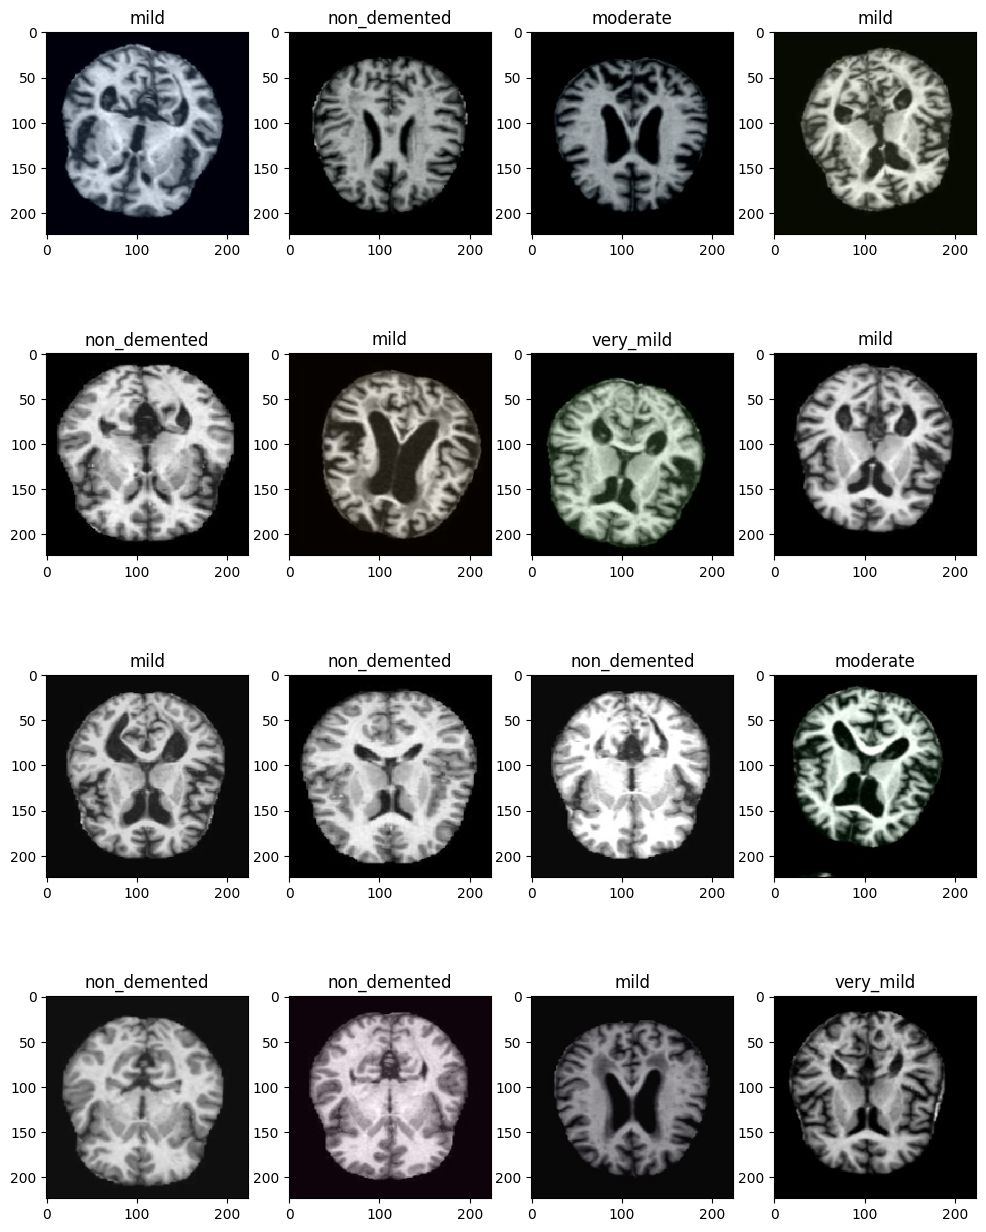

In [6]:
#We take the first batch of 16 images. We unpack a tuple (array with pixels info, labels) = 16 images x 16 labels
images, labels = train_dataset[0]

label_mapping = {
    (1, 0, 0, 0): "mild",
    (0, 1, 0, 0): "moderate",
    (0, 0, 1, 0): "non_demented",
    (0, 0, 0, 1): "very_mild"
}

num_images = len(images)
num_rows = (num_images + 3) // 4  # Ensure an even number of rows with 4 columns

fig, ax = plt.subplots(num_rows, 4, figsize=(12, 4 * num_rows))

for idx in range(num_images):
    row_idx = idx // 4
    col_idx = idx % 4
    ax[row_idx, col_idx].imshow(np.array(images[idx]))
    
    # Reverse engineer one-hot encoded label to get the class index
    class_index = np.argmax(labels[idx])
    
    # Map class index to corresponding string and set as title
    mapped_label = label_mapping[tuple(labels[idx])]
    ax[row_idx, col_idx].set_title(mapped_label)

# Hide empty subplots if the number of images is not a multiple of 4
if num_images % 4 != 0:
    for i in range(num_images % 4, 4):
        ax[-1, i].axis('off')

plt.show()

# 5 - METRIC FOR EVALUATION

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #3c0000; color: #f4f4f4;">
    📌 &nbsp; The data is not balanced, so accuracy would not be the best metric to use here alone. I am going to use accuracy along ROC AUC to address this issue.
    
ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.
</div>


# **6 - MODELING**

In [42]:

# AShape of images: (224, 224, 3)
input_shape = (224, 224, 3)

# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming you have 4 classes

In [43]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', AUC()])

# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 26, 26, 128)      

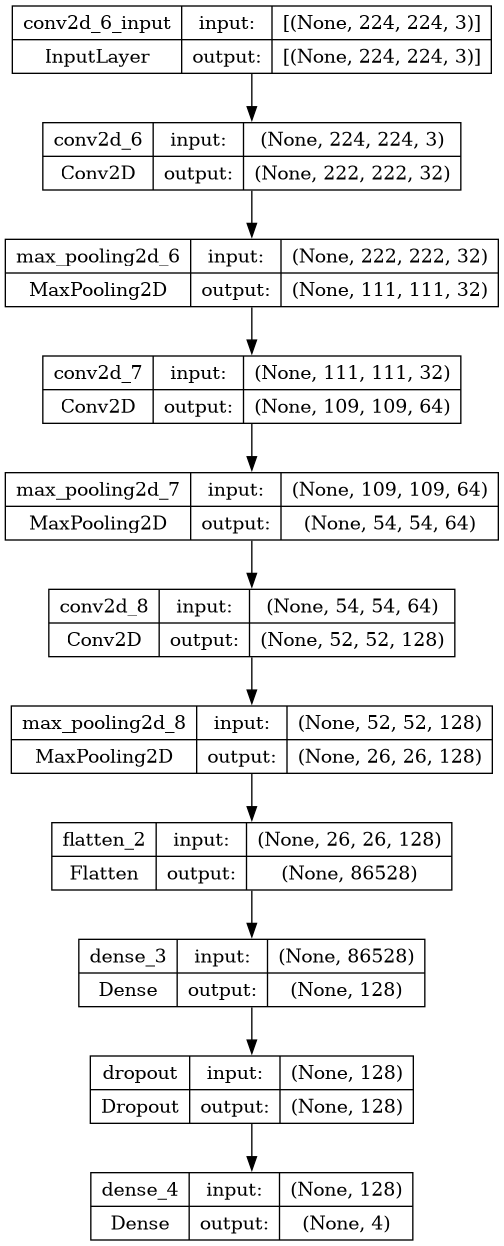

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [44]:
#early_stopping = EarlyStopping(monitor='val_auc', patience=3, restore_best_weights=True) #Worse performance of the model
hist=model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
1700/1700 [==============================] - 70s 40ms/step - loss: 0.9497 - accuracy: 0.5558 - auc_2: 0.8308 - val_loss: 0.6743 - val_accuracy: 0.6959 - val_auc_2: 0.9177
Epoch 2/10
1700/1700 [==============================] - 66s 39ms/step - loss: 0.6609 - accuracy: 0.6968 - auc_2: 0.9191 - val_loss: 0.5056 - val_accuracy: 0.7769 - val_auc_2: 0.9539
Epoch 3/10
1700/1700 [==============================] - 70s 41ms/step - loss: 0.5264 - accuracy: 0.7589 - auc_2: 0.9489 - val_loss: 0.4395 - val_accuracy: 0.8124 - val_auc_2: 0.9662
Epoch 4/10
1700/1700 [==============================] - 70s 41ms/step - loss: 0.4491 - accuracy: 0.7990 - auc_2: 0.9629 - val_loss: 0.3839 - val_accuracy: 0.8418 - val_auc_2: 0.9747
Epoch 5/10
1700/1700 [==============================] - 67s 39ms/step - loss: 0.3900 - accuracy: 0.8249 - auc_2: 0.9720 - val_loss: 0.3792 - val_accuracy: 0.8373 - val_auc_2: 0.9746
Epoch 6/10
1700/1700 [==============================] - 65s 38ms/step - loss: 0.3469 - acc

# 6 - LOSS, ACCURACY & ROC AUC PLOTS

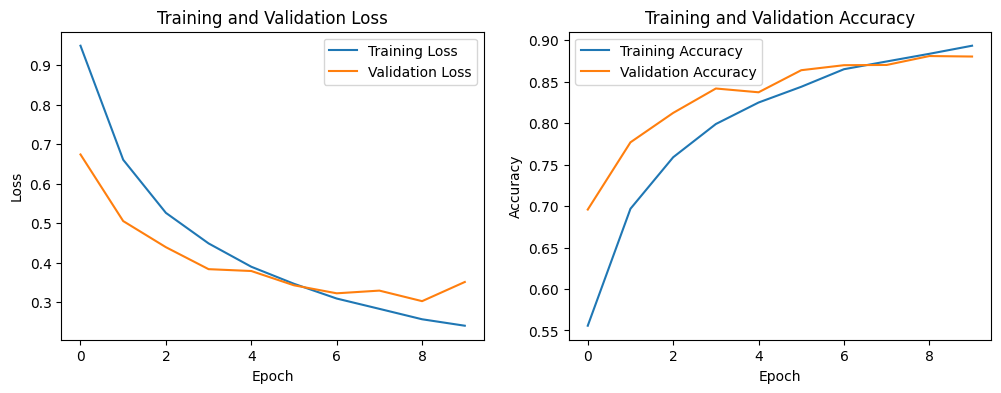

In [45]:
# Get training and validation loss values
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Get training and validation accuracy values
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']


# Plotting the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


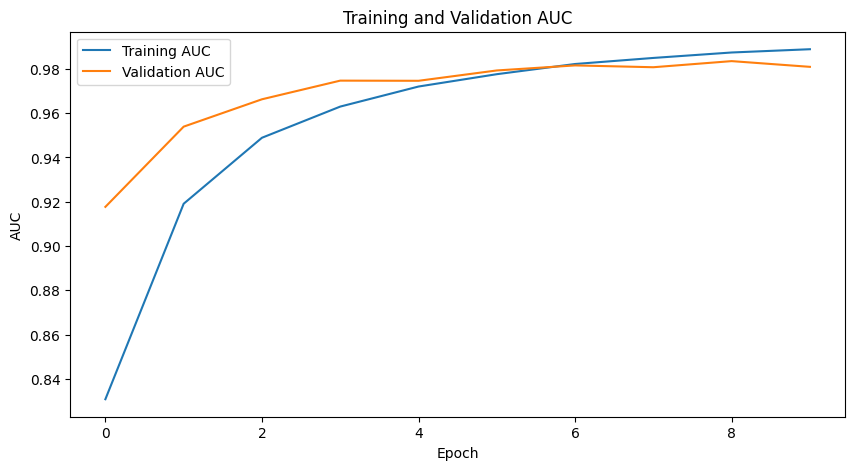

In [49]:
# Get training and validation AUC values
train_auc = hist.history['auc_2']
val_auc = hist.history['val_auc_2']

# Plotting the training and validation AUC
plt.figure(figsize=(10,5))
plt.plot(train_auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.show()

<span style="color:crimson;">Decreasing Loss:</span> The training loss and validation loss are both decreasing over the epochs. This indicates that the model is learning and improving its ability to make predictions.

<span style="color:crimson;">Increasing Accuracy: </span> The training accuracy and validation accuracy are both increasing over the epochs. This suggests that the model is becoming more accurate in classifying the data.

<span style="color:crimson;">Performance Discrepancy:</span> In some epochs, there is a slight discrepancy between training and validation performance. For example, in Epoch 7, there is a higher validation loss and lower accuracy compared to the training set. This could be due to overfitting or issues in the data distribution. I need to monitor this and consider applying regularization or adjusting the model architecture if necessary.

<span style="color:crimson;">High Validation Accuracy:</span>The validation accuracy reaches a high value of around 99.12% in the last epoch, indicating that the model generalizes well to unseen data.

<span style="color:crimson;">Consistent Improvement:</span> The model continues to improve over the epochs, with decreasing loss and increasing accuracy. This is a positive sign of effective learning.

<span style="color:crimson;">ROC AUC:</span> AUC on the training set also improves, suggesting that the model is getting better at distinguishing between positive and negative instances. The AUC on the validation set is consistently high, indicating that the model performs well in terms of classification ability.

# **7 - EVALUATION THE MODEL ITH NEW DATA**


<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;">💬 Now, I am going to evaluate the model using unseen images. These new MRI images were collected from a different source. This set is made out of 6400 images belonging to the four categories already explained in which our model was trained. See Kaggle Notebook Link below for references.</p></blockquote>

https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset

In [16]:
evaluation_data_path = "/kaggle/input/alzheimer-mri-dataset/Dataset"

In [50]:

test_image_generator = ImageDataGenerator(rescale= 1/255)

test_dataset = test_image_generator.flow_from_directory(batch_size = 16,
                                                   directory= evaluation_data_path,
                                                   shuffle = True,
                                                   target_size=(224,224), #ORIGINAL IMAGES ARE 128 X 128, I RESHAPE INTO 224X224
                                                   class_mode="categorical")

Found 6400 images belonging to 4 classes.


In [51]:
#Using evaluate() on our model with the new unseen data
evaluation_results = model.evaluate(test_dataset)

400/400 [==============================] - 13s 33ms/step - loss: 0.0920 - accuracy: 0.9653 - auc_2: 0.9979


In [52]:
# The evaluation results
loss, accuracy, roc_auc = evaluation_results

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("Test Roc Auc:", roc_auc)

Test Loss: 0.0919923484325409
Test Accuracy: 0.9653124809265137
Test Roc Auc: 0.9978863596916199


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #804000; color: #f4f4f4;">
     &nbsp; After using new unseen Data, the model performs just as great as it does in the validation set.
    
It reaches almost 99% accuracy and ROC AUC is 0.99.  
</div>